## Задание 1

Построить (визуализировать) произвольный граф: 22 вершин, 32 ребер. Составить для данного графа матрицы смежности, инцидентности, достижимости.

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import random

import pylab

In [8]:
DEF_COLOR = "green"
RES_COLOR = "blue" 
FONT_COLOR = "black"
IMG_PATH = "/imgs/"

SLUCH_COLOR = "turquoise"
FRACT_COLOR = "chocolate"
WORLD_COLOR = ""

In [9]:
def print_graf(gr, save=False, filename="foo"):#рисует граф и сохраняет картинку
    plt.rcParams ['figure.figsize'] = [40, 40] #увеличиваем размер полотна для вывода графа
    pos = nx.get_node_attributes(gr, 'pos')
    if len(pos) ==0:
        # pos = nx.circular_layout(gr)
        pos =  nx.spring_layout(gr)
    edge_labels = nx.get_edge_attributes(gr, "weight")
    node_color = tuple(nx.get_node_attributes(gr, "node_color").values())
    edge_color =  tuple(nx.get_edge_attributes(gr, "edge_color").values())
    if len(node_color)==0:
        node_color=DEF_COLOR
        nx.set_node_attributes(gr, "node_color",DEF_COLOR )
    if len(edge_color)==0:
        edge_color = DEF_COLOR
        nx.set_edge_attributes(gr, "edge_color",DEF_COLOR )
    options = {
        # "arrowsize" : 15,# size of arrow
        # 'arrowstyle': '-|>',        # array style for directed graph
        "edge_color": edge_color, # edge color
        "node_color": node_color,
        "node_size" : 1000,
        'width': 2,
        'font_color':FONT_COLOR,
    }
    nx.draw(gr, pos,  with_labels=True, arrows=True, **options)
    nx.draw_networkx_edge_labels(gr, pos, edge_labels=edge_labels)
    # hvnx.draw(gr, pos, node_color='lightgray').opts(tools=[HoverTool(tooltips=[('index', '@index_hover')])])
    plt.show()
    if save:
        plt.savefig(IMG_PATH+filename+'.png')

In [10]:
def print_info_graf(gr, printing = True):#выводит информацию о ребрах графа
    graf_info={}
    testG = nx.Graph()
    testG.add_edges_from(list(gr.edges()))
    graf_info["radius"] = nx.radius(testG)
    graf_info["diameter"] = nx.diameter(testG)
    if printing:
        # print("Рёбра графа:")
        # for edge in gr.edges(data=True):
        #     print(edge, end=',')
        print("Радиус графа: ",nx.radius(testG))
        print("Диаметр графа: ", nx.diameter(testG))

        if nx.is_directed(gr):
            if nx.is_weakly_connected(gr):
                print('Граф является направленным и состоит из одной компоненты слабой связности.')
            else:
                print('Граф является направленным и состоит из нескольких компонент.')
        else:
            if nx.is_connected(gr):
                print('Граф является ненаправленным и связным.')
            else:
                print('Граф является ненаправленным и состоит из нескольких компонент.')
        print("Плотность графа, отношение рёбер и узлов: ", nx.density(gr))
        # Коэффициент ассортативности (насколько вся сеть завязана на основных "хабах"):

        print("Коэффициент ассортативности:",nx.degree_pearson_correlation_coefficient(gr))
        # print("Центральность узлов:")
        # deg = nx.degree_centrality(gr)
        # for nodeid in sorted(deg, key=deg.get, reverse=True):
        #     print(nodeid)
    return graf_info

In [11]:
def set_graf_color(gr, node_color = DEF_COLOR, edge_color = False):
    if not edge_color:
        edge_color = node_color
    for node in gr.nodes():
        gr.nodes()[node]["node_color"] = node_color
    for edge in gr.edges():
        gr.edges()[edge]["edge_color"] = edge_color


In [21]:
V = 22     #количество вершин
M = 32 
P = 0.05
K = 0.5

In [22]:
SEED = 123

In [23]:
sluchG = nx.gnp_random_graph(V, P, seed=SEED)
while not nx.is_connected(sluchG):
    sluchG = nx.gnp_random_graph(V, P, seed=SEED)
    SEED+=1
print(SEED)

17532


In [24]:
set_graf_color(sluchG,SLUCH_COLOR,SLUCH_COLOR)
len(sluchG.edges())

25

In [25]:
def circ2pos(g):
    deg = nx.degree_centrality(g)
    print(deg)
    avg_deg = sum(deg.values())/len(deg.values())

    tg = nx.Graph()
    tg.add_nodes_from([i for i in g.nodes() if deg[i]>=avg_deg])

    pos = nx.circular_layout(g)
    print(pos)
    for node in g.nodes():
        node_pos = pos[node]
        if not node in tg.nodes():
            if pos[node][0]>0:
                pos[node][0]+=K
            else:
                pos[node][0]-=K

            if pos[node][1]>0:
                pos[node][1]+=K
            else:
                pos[node][1]-=K
        # else:
        #     node_pos = pos[node]
        g.nodes()[node]["pos"] = node_pos

In [26]:
circ2pos(sluchG)

{0: 0.19047619047619047, 1: 0.09523809523809523, 2: 0.09523809523809523, 3: 0.047619047619047616, 4: 0.09523809523809523, 5: 0.09523809523809523, 6: 0.19047619047619047, 7: 0.09523809523809523, 8: 0.14285714285714285, 9: 0.047619047619047616, 10: 0.09523809523809523, 11: 0.14285714285714285, 12: 0.047619047619047616, 13: 0.047619047619047616, 14: 0.047619047619047616, 15: 0.047619047619047616, 16: 0.09523809523809523, 17: 0.047619047619047616, 18: 0.23809523809523808, 19: 0.09523809523809523, 20: 0.19047619047619047, 21: 0.19047619047619047}
{0: array([1.0000000e+00, 8.0377156e-09]), 1: array([0.95949298, 0.28173257]), 2: array([0.84125352, 0.54064078]), 3: array([0.65486074, 0.75574959]), 4: array([0.41541508, 0.90963197]), 5: array([0.14231487, 0.98982144]), 6: array([-0.14231483,  0.98982144]), 7: array([-0.41541501,  0.90963203]), 8: array([-0.65486067,  0.75574965]), 9: array([-0.84125351,  0.54064078]), 10: array([-0.95949298,  0.2817326 ]), 11: array([-9.99999995e-01, -7.9385060

#### Граф

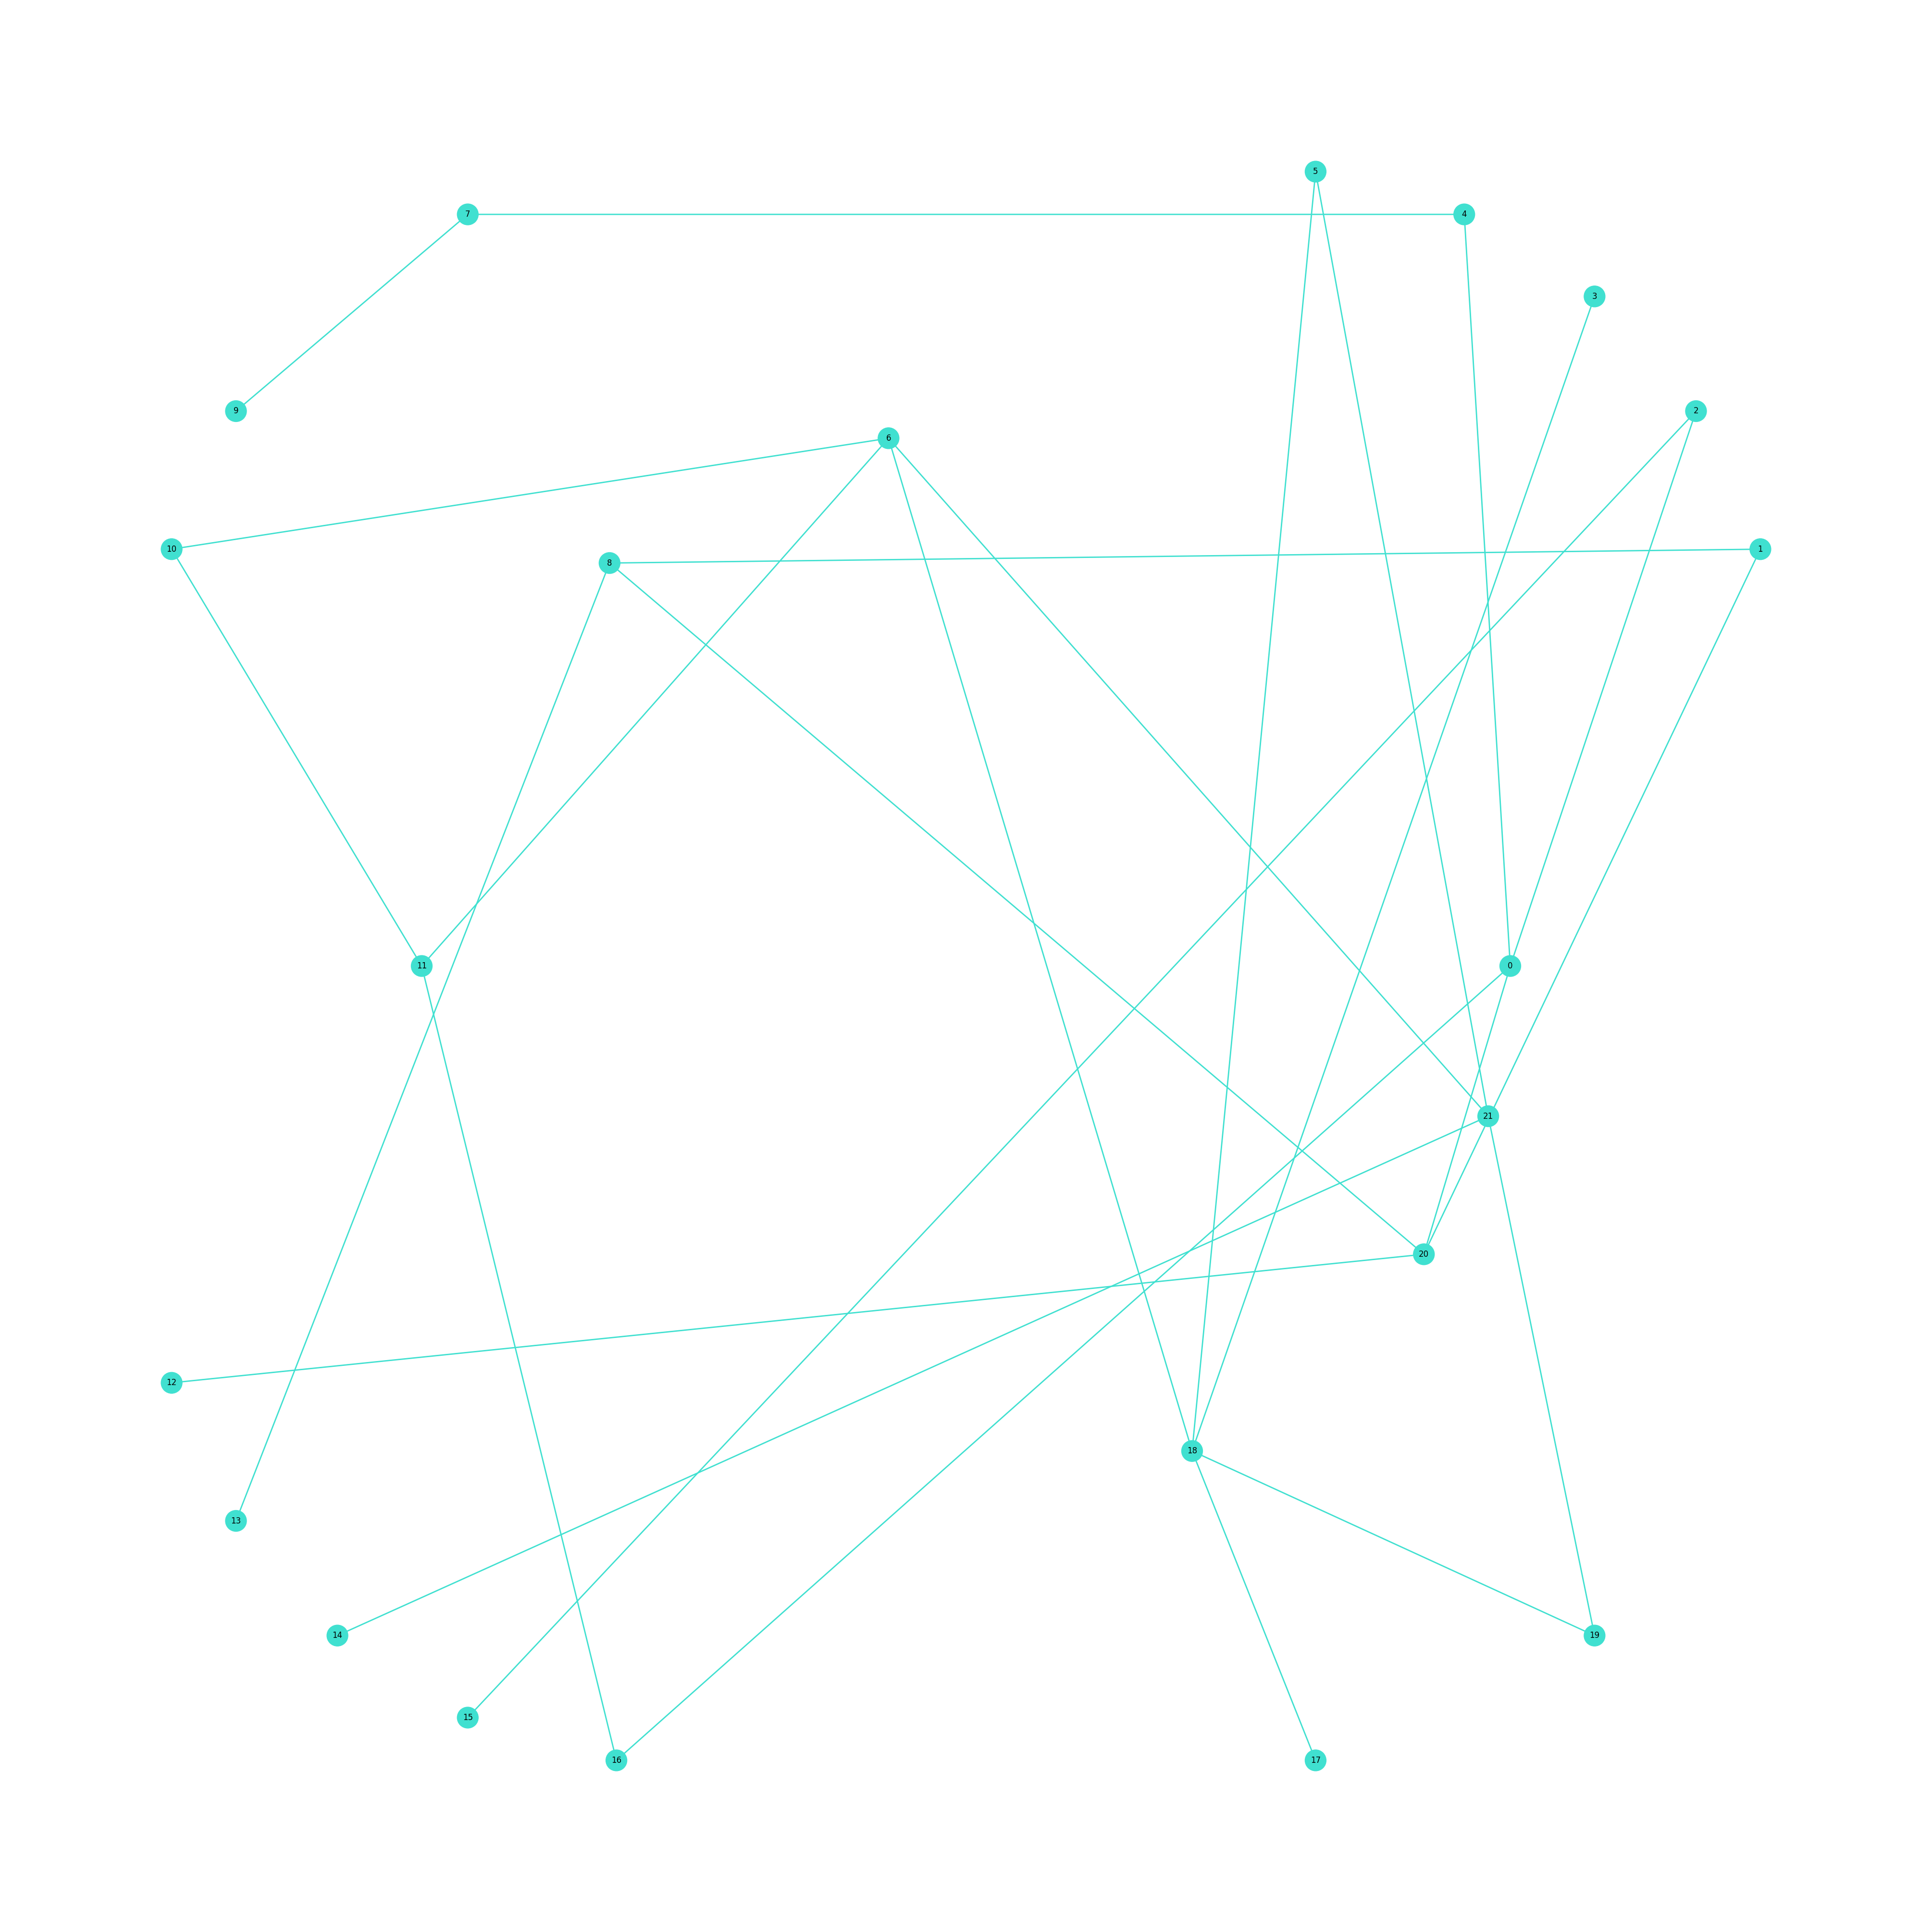

In [27]:
print_graf(sluchG)

In [28]:
print_info_graf(sluchG)

Радиус графа:  4
Диаметр графа:  8
Граф является ненаправленным и связным.
Плотность графа, отношение рёбер и узлов:  0.10822510822510822
Коэффициент ассортативности: -0.355421686746988


{'radius': 4, 'diameter': 8}

#### Матрица смежности

In [38]:
A = nx.adjacency_matrix(sluchG)
print(A.todense())

[[0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1]
 [0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1]
 [1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1

#### Матрица инцидентности

In [39]:
B = nx.adjacency_matrix(sluchG)
print(B.todense())

[[0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1]
 [0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1]
 [1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1

#### Матрица достижимости

In [41]:
length = dict(nx.all_pairs_shortest_path_length(sluchG))

R = np.array([[length.get(m, {}).get(n, 0) > 0 for m in sluchG.nodes] for n in sluchG.nodes], dtype=np.int32)

print(R)

[[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1]
 [1 1 1 1 1 1